# PCA Plots

## General settings and loading files

In [1]:
%%time

% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM

% run datasets_settings.py

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples | grep -v total

/home/juan/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/home/juan/repos/tesina/panels/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]


[15:14:51] 'panels' dict
[15:14:51] 'galanter', 'present', 'missing' dataframes
[15:14:51] 'panel_labels'
[15:14:51] 'panel_names' dict
[15:14:51] 'panel_rsIDs' dict
[15:14:51] 'genome' dataframe
[15:14:59] 'lat' dataframe
[15:15:12] 'control_genotypes' huge datagrame
[15:15:12] 'control_rsIDs' dict to filter it ^
[15:15:12] 'cp_factors' list
[15:15:12] 'control_labels'
[15:15:12] 'control_names' dict
[15:15:12] 'df_1000G_samples'
[15:15:12] 'df_1000G_SNPs'
[15:15:12] 'df_1000G_genotypes'
[15:15:12] 'df_1000G_populations'
[15:15:13] 'df_1000G_genotypes_alleles'
[15:15:13] 'mafs' dataframe
[15:15:13] 'dataset_names'
[15:15:13] 'dataset_populations'
[15:15:13] 'dataset_samples' created and written to files
[15:15:25] 'ancestries_df' read from ADMIXTURE results

  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_

/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Create the datasets
Lists of sample IDs of chosen populations to later filter 1000 Genomes data.

## PCA plots

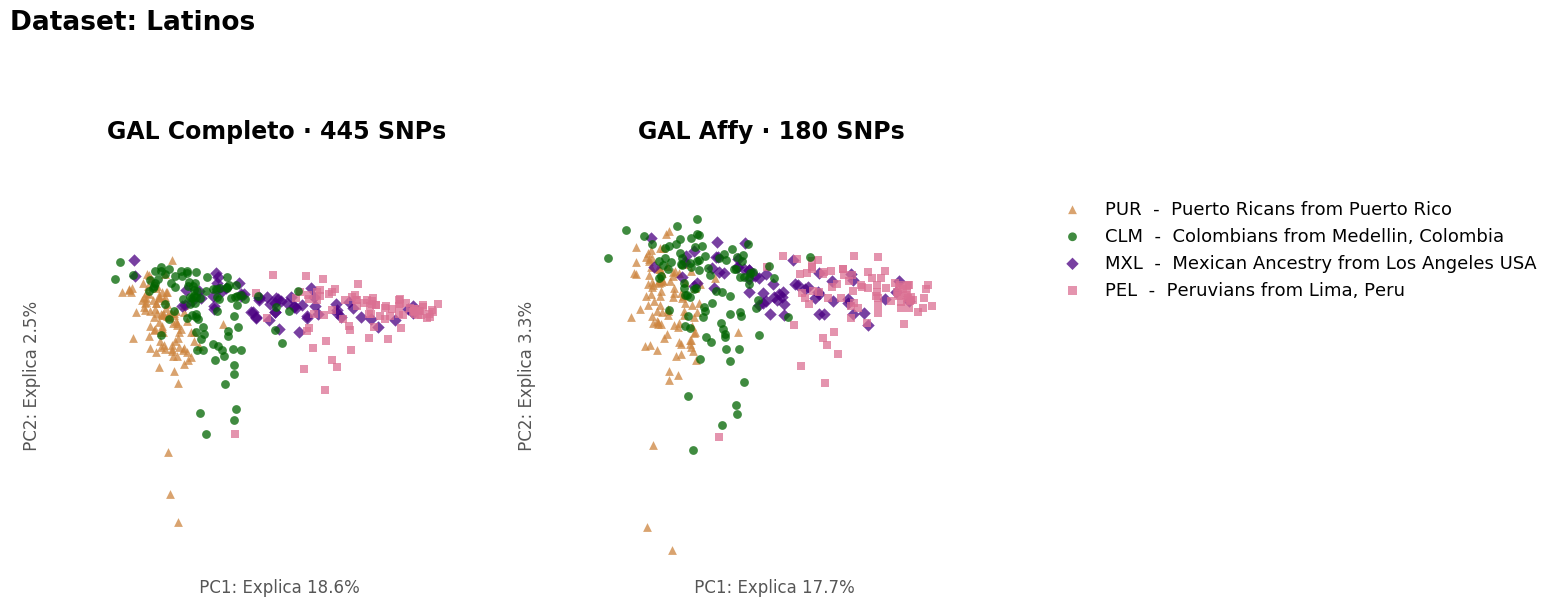

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
# %%time

# == WARNING ==
# This cell will take ~4m to execute

from plotters.pca import PCAPlotter

pca_plotter = PCAPlotter()
components_to_compare = [("PC1", "PC2")]

def make_filename(dataset_label, panel_labels, components_to_compare):
    return "{}__{}__PCx{}".format(dataset_label,
                                "_".join(panel_labels),
                             len(components_to_compare) * 2)

for dataset_label, sample_ids in dataset_samples.items():
    
    
    fig_title = "Dataset: {}".format(dataset_names[dataset_label])

    # GAL Panles
    dataset_genotypes = df_1000G_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, panel_labels, components_to_compare)
    populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
    pca_plotter.plot(fig_title, panel_rsIDs, dataset_genotypes, df_1000G_samples,
                     components_to_compare, panel_names, filename,
                     populations_to_plot)
    
    # Control Panels
    dataset_genotypes = control_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, control_labels, components_to_compare)
    populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
    pca_plotter.plot(fig_title, control_rsIDs, dataset_genotypes, df_1000G_samples,
                     components_to_compare, control_names, filename,
                     populations_to_plot)
    
    # Control Panels - Extra components
    only_big_cp = {"100": control_rsIDs["100"]}
    more_components_to_compare = [("PC3", "PC4"), ("PC5", "PC6"),
                                  ("PC7", "PC8")]
    dataset_genotypes = control_genotypes.loc[sample_ids, :]
    populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
    filename = make_filename(dataset_label, ["100"], more_components_to_compare)
    pca_plotter.plot(fig_title, only_big_cp, dataset_genotypes, df_1000G_samples,
                     more_components_to_compare, control_names, filename,
                     populations_to_plot)